In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

Data Collection And Processing

In [2]:
#loading csv data to pandas dataframe

In [3]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\Phone_cleaned_dataset.csv')

In [4]:
data.head()

,Unnamed: 0,Brand me,Ratings,RAM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,LG,4.3,4,6.00,48,13,4000,24999
1,1,IKall,3.4,6,4.50,48,12,4000,15999
2,2,Nokia,4.3,4,4.50,64,16,4000,15000
3,3,Samsung,4.4,6,6.40,48,15,3800,18999
4,4,POCO,4.5,6,6.18,35,15,3800,18999


In [5]:
data.tail()

,Unnamed: 0,Brand me,Ratings,RAM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
516,516,Samsung,4.6,4,6.20,35,8,3500,53990
517,517,Black,4.4,6,6.39,48,12,3800,31999
518,518,Karbonn,3.8,6,4.54,48,12,2800,1299
519,519,Alcatel,4.4,3,6.20,48,1,3800,9790
520,520,Blacear,3.5,6,4.50,64,15,1050,799


In [6]:
data.shape

(521, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     521 non-null    int64  
 1   Brand me       521 non-null    object 
 2   Ratings        521 non-null    float64
 3   RAM            521 non-null    int64  
 4   Mobile_Size    521 non-null    float64
 5   Primary_Cam    521 non-null    int64  
 6   Selfi_Cam      521 non-null    int64  
 7   Battery_Power  521 non-null    int64  
 8   Price          521 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 36.8+ KB


In [8]:
data = data.drop('Unnamed: 0',axis=1)
data = data.drop('Ratings',axis=1)
data.describe()


,RAM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,5.725528,5.603512,46.525912,9.543186,3517.562380,22509.343570
std,1.854180,0.898864,10.094543,6.433876,876.863021,43158.655558
min,1.000000,3.700000,5.000000,0.000000,1020.000000,479.000000
25%,4.000000,4.540000,38.000000,5.000000,3000.000000,1280.000000
50%,6.000000,5.990000,48.000000,8.000000,3500.000000,14995.000000
75%,8.000000,6.400000,48.000000,13.000000,4020.000000,29499.000000
max,10.000000,6.700000,64.000000,61.000000,6000.000000,563000.000000


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

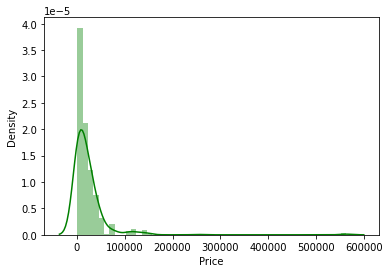

In [9]:
#checking the distribution of price
sns.distplot(data['Price'],color='green')


In [10]:
encoder = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity
encoded_brands = encoder.fit_transform(data[['Brand me']]).toarray()

In [11]:
encoded_brands_df = pd.DataFrame(encoded_brands, columns=encoder.get_feature_names(['Brand me']))
data_encoded = pd.concat([data.drop('Brand me', axis=1), encoded_brands_df], axis=1)

In [12]:
X = data_encoded.drop('Price', axis=1)
Y = data_encoded['Price']

In [13]:
print(X)

     RAM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  Brand me_Apple  \
0      4         6.00           48         13           4000             0.0   
1      6         4.50           48         12           4000             0.0   
2      4         4.50           64         16           4000             0.0   
3      6         6.40           48         15           3800             0.0   
4      6         6.18           35         15           3800             0.0   
..   ...          ...          ...        ...            ...             ...   
516    4         6.20           35          8           3500             0.0   
517    6         6.39           48         12           3800             0.0   
518    6         4.54           48         12           2800             0.0   
519    3         6.20           48          1           3800             0.0   
520    6         4.50           64         15           1050             0.0   

     Brand me_Blacear  Brand me_Blacerr

In [14]:
print(Y)

0      24999
1      15999
2      15000
3      18999
4      18999
       ...  
516    53990
517    31999
518     1299
519     9790
520      799
Name: Price, Length: 521, dtype: int64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [17]:
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [18]:
Y_pred = model.predict(X_test)

In [19]:
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8324396870153797


In [20]:
scores = []

# Loop for multiple random states
for i in range(100):
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    
    # Column transformer with StandardScaler
    column_trans = make_column_transformer((StandardScaler(), X.columns), remainder='passthrough')
    
    # RandomForestRegressor
    rf = RandomForestRegressor(random_state=i)
    
    # Pipeline
    pipe = make_pipeline(column_trans, rf)
    
    # Train the model
    pipe.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = pipe.predict(X_test)
    
    # Append the r2 score to the list
    scores.append(r2_score(Y_test, Y_pred))

In [21]:
np.argmax(scores)

35

In [22]:
scores[np.argmax(scores)]

0.9734490561262253